#### Importing the neccessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split

#### Reading the file

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#Standardize header names
#1. user lower case
customer_df.columns = customer_df.columns.str.lower()

#2.renaming
customer_df.rename(columns={'employmentstatus': 'employment status'}, inplace = True)

#3.removing spaces and adding underscore
customer_df.columns = customer_df.columns.map(lambda x: x.replace(" ","_"))
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### The columns that are numerical:

In [4]:
numerical = customer_df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


#### 1.We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

#### Checking which columns have outliers

C:\Users\agnes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\agnes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\agnes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\agnes\anaconda3\lib\si

<Figure size 432x288 with 0 Axes>

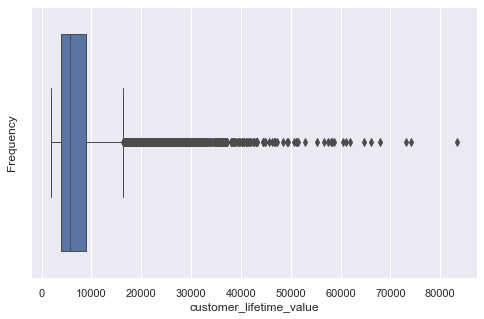

<Figure size 576x360 with 0 Axes>

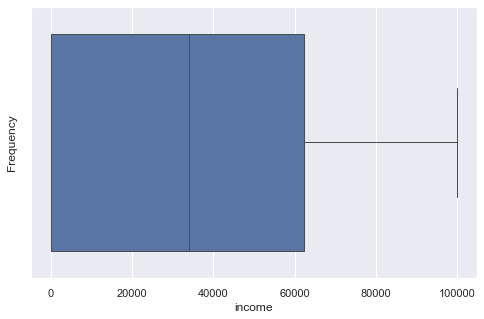

<Figure size 576x360 with 0 Axes>

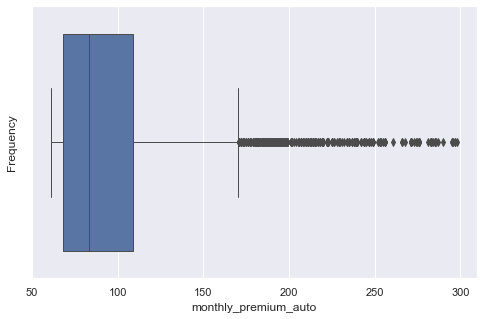

<Figure size 576x360 with 0 Axes>

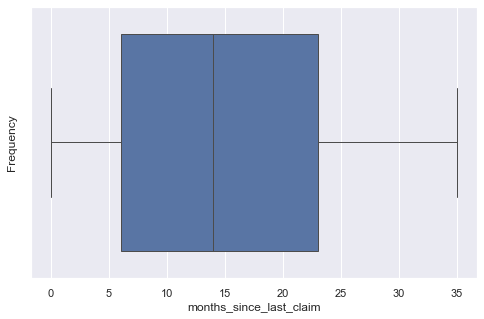

<Figure size 576x360 with 0 Axes>

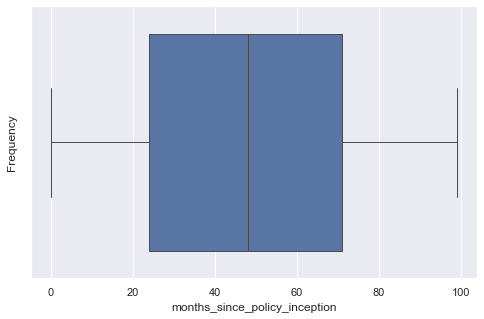

<Figure size 576x360 with 0 Axes>

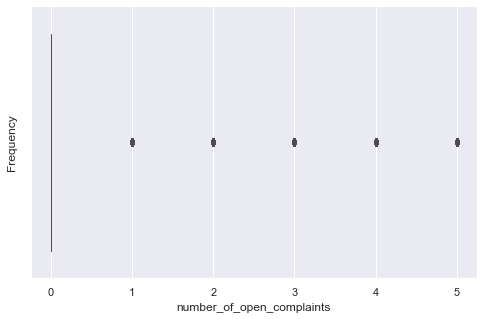

<Figure size 576x360 with 0 Axes>

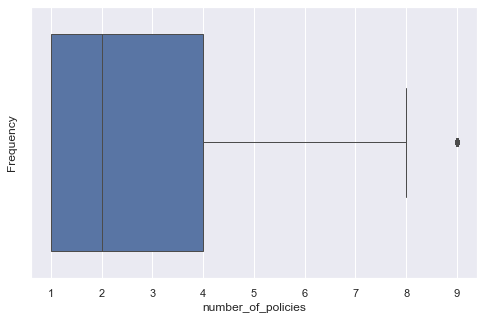

<Figure size 576x360 with 0 Axes>

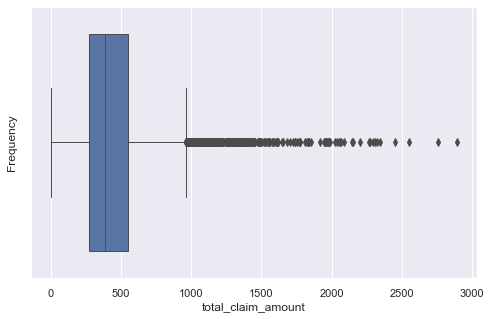

In [5]:
for i in numerical.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numerical[i], ax=ax_box , linewidth= 1.0)

In [6]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


#### Removing outliers

In [7]:
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1

numerical = numerical[~((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\agnes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\agnes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\agnes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\agnes\anaconda3\lib\si

<Figure size 576x360 with 0 Axes>

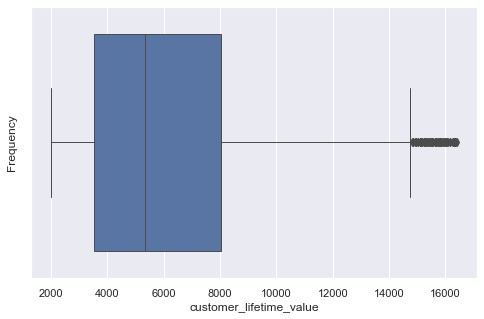

<Figure size 576x360 with 0 Axes>

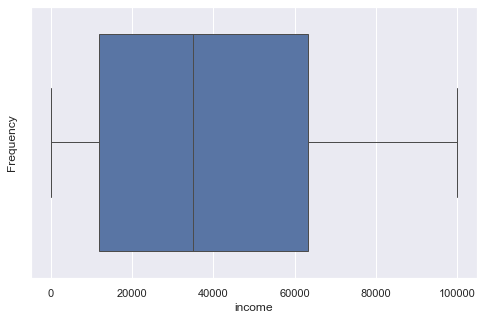

<Figure size 576x360 with 0 Axes>

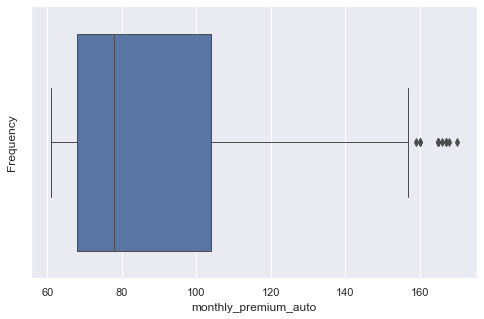

<Figure size 576x360 with 0 Axes>

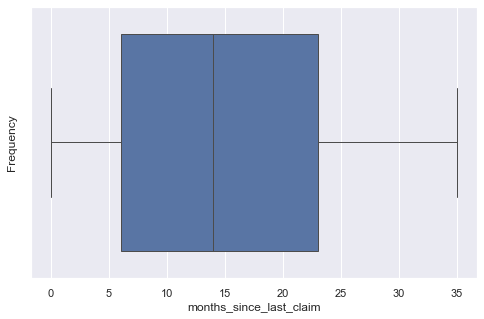

<Figure size 576x360 with 0 Axes>

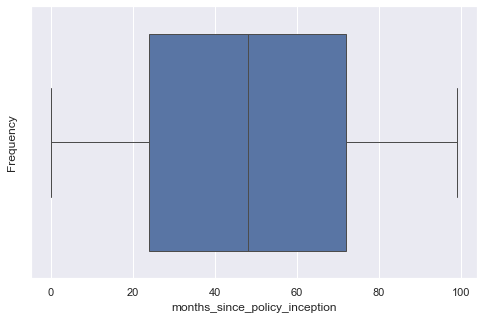

<Figure size 576x360 with 0 Axes>

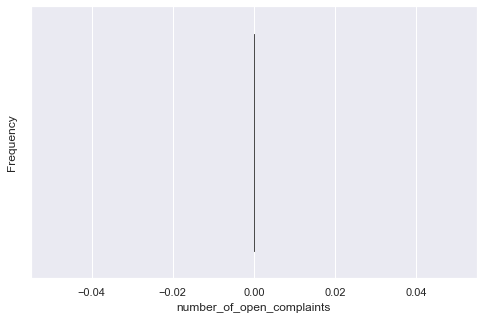

<Figure size 576x360 with 0 Axes>

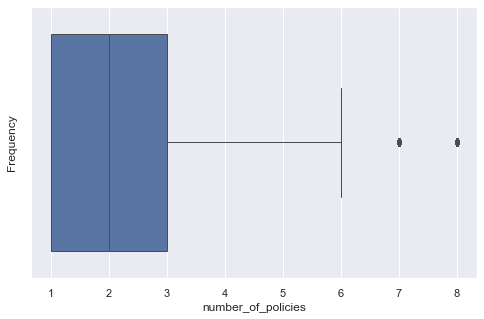

<Figure size 576x360 with 0 Axes>

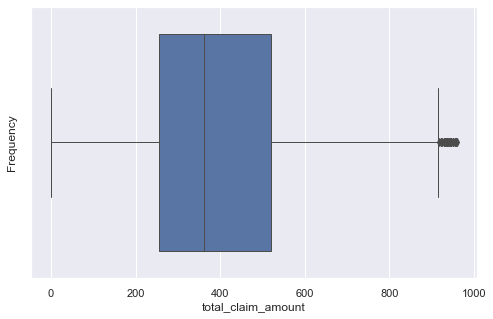

In [8]:

for i in numerical.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numerical[i], ax=ax_box , linewidth= 1.0)
    

#### 2.Create a copy of the dataframe for the data wrangling.

In [9]:
customer_df_wrangling = customer_df

### 3. Normalize the continuous variables. You can use any one method you want.

In [10]:
from sklearn.preprocessing import MinMaxScaler

normalized = customer_df_wrangling.select_dtypes(np.number)
customer_df_wrangling[normalized.columns] = MinMaxScaler().fit_transform(normalized)
customer_df_wrangling

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,0.010629,No,Basic,Bachelor,2/24/11,Employed,F,0.562847,...,0.050505,0.0,0.000,Corporate Auto,Corporate L3,Offer1,Agent,0.132974,Two-Door Car,Medsize
1,QZ44356,Arizona,0.062406,No,Extended,Bachelor,1/31/11,Unemployed,F,0.000000,...,0.424242,0.0,0.875,Personal Auto,Personal L3,Offer3,Agent,0.391051,Four-Door Car,Medsize
2,AI49188,Nevada,0.134960,No,Premium,Bachelor,2/19/11,Employed,F,0.487763,...,0.383838,0.0,0.125,Personal Auto,Personal L3,Offer1,Agent,0.195764,Two-Door Car,Medsize
3,WW63253,California,0.070589,No,Basic,Bachelor,1/20/11,Unemployed,M,0.000000,...,0.656566,0.0,0.750,Corporate Auto,Corporate L2,Offer1,Call Center,0.183117,SUV,Medsize
4,HB64268,Washington,0.011245,No,Basic,Bachelor,2/3/11,Employed,M,0.438443,...,0.444444,0.0,0.000,Personal Auto,Personal L1,Offer1,Agent,0.047710,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,0.264137,No,Basic,Bachelor,2/10/11,Employed,M,0.719547,...,0.898990,0.0,0.125,Personal Auto,Personal L1,Offer2,Web,0.068485,Four-Door Car,Medsize
9130,PK87824,California,0.014719,Yes,Extended,College,2/12/11,Employed,F,0.216081,...,0.282828,0.0,0.000,Corporate Auto,Corporate L3,Offer1,Branch,0.131034,Four-Door Car,Medsize
9131,TD14365,California,0.076951,No,Extended,Bachelor,2/6/11,Unemployed,M,0.000000,...,0.373737,0.6,0.125,Corporate Auto,Corporate L2,Offer1,Branch,0.273297,Four-Door Car,Medsize
9132,UP19263,California,0.069098,No,Extended,College,2/3/11,Employed,M,0.219452,...,0.030303,0.0,0.250,Personal Auto,Personal L2,Offer3,Branch,0.238876,Four-Door Car,Large


### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [11]:
#I am doing step 5 before step 4, so I can extract the day, week and month from Effective to Date before we encode it.  
customer_df['effective_to_date'] = pd.DatetimeIndex(customer_df['effective_to_date'])

customer_df_wrangling['effective_to_week'] =    customer_df_wrangling['effective_to_date'].dt.week
customer_df_wrangling['effective_to_month'] = customer_df_wrangling['effective_to_date'].dt.month
customer_df_wrangling['effective_to_day'] =   customer_df_wrangling['effective_to_date'].dt.day

C:\Users\agnes\AppData\Local\Temp\ipykernel_29908\4134706373.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  customer_df_wrangling['effective_to_week'] =    customer_df_wrangling['effective_to_date'].dt.week


In [12]:
customer_df_wrangling = customer_df_wrangling.drop('effective_to_date',axis=1)

### 4.Encode the categorical variables

###### Hint for Categorical Variables

###### You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
###### One hot to state
###### Ordinal to coverage
###### Ordinal to employmentstatus
###### Ordinal to location code
###### One hot to marital status
###### One hot to policy type
###### One hot to policy
###### One hot to renew offercustomer_df
###### One hot to sales channel
###### One hot vehicle class
###### Ordinal vehicle size

In [13]:
import category_encoders
encoder = category_encoders.OrdinalEncoder()

encoder = encoder.fit(customer_df_wrangling['coverage'])

customer_df_wrangling['coverage'] = encoder.transform(customer_df_wrangling['coverage'])


encoder = encoder.fit(customer_df_wrangling['employment_status'])

customer_df_wrangling['employment_status'] = encoder.transform(customer_df_wrangling['employment_status'])


encoder = encoder.fit(customer_df_wrangling['location_code'])

customer_df_wrangling['location_code'] = encoder.transform(customer_df_wrangling['location_code'])


encoder = encoder.fit(customer_df_wrangling['vehicle_size'])

customer_df_wrangling['vehicle_size'] = encoder.transform(customer_df_wrangling['vehicle_size'])


customer_df_wrangling

#encoder.inverse_transform(customer_df_wrangling) this is used to decode the categories

customer_df_wrangling = pd.get_dummies(customer_df_wrangling, drop_first = True)
customer_df_wrangling

,customer_lifetime_value,coverage,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.010629,1,1,0.562847,1,0.033755,0.914286,0.050505,0.0,0.000,...,0,0,0,0,0,0,0,0,0,1
1,0.062406,2,2,0.000000,1,0.139241,0.371429,0.424242,0.0,0.875,...,1,0,0,0,0,0,0,0,0,0
2,0.134960,3,1,0.487763,1,0.198312,0.514286,0.383838,0.0,0.125,...,0,0,0,0,0,0,0,0,0,1
3,0.070589,1,2,0.000000,1,0.189873,0.514286,0.656566,0.0,0.750,...,0,0,0,1,0,0,0,1,0,0
4,0.011245,1,1,0.438443,2,0.050633,0.342857,0.444444,0.0,0.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,1,1,0.719547,3,0.050633,0.514286,0.898990,0.0,0.125,...,0,0,0,0,1,0,0,0,0,0
9130,0.014719,2,1,0.216081,1,0.075949,0.400000,0.282828,0.0,0.000,...,0,0,1,0,0,0,0,0,0,0
9131,0.076951,2,2,0.000000,1,0.101266,0.257143,0.373737,0.6,0.125,...,0,0,1,0,0,0,0,0,0,0
9132,0.069098,2,1,0.219452,1,0.147679,0.971429,0.030303,0.0,0.250,...,1,0,1,0,0,0,0,0,0,0


In [14]:
customer_df_wrangling.columns

Index(['customer_lifetime_value', 'coverage', 'employment_status', 'income',
       'location_code', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies',
       ...
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Luxury Car',
       'vehicle_class_Luxury SUV', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car'],
      dtype='object', length=9181)

In [15]:
customer_df_wrangling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Columns: 9181 entries, customer_lifetime_value to vehicle_class_Two-Door Car
dtypes: float64(8), int32(4), int64(3), uint8(9166)
memory usage: 80.7 MB


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [16]:
customer_df_wrangling = customer_df_wrangling.astype('float64')
customer_df_wrangling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Columns: 9181 entries, customer_lifetime_value to vehicle_class_Two-Door Car
dtypes: float64(9181)
memory usage: 639.8 MB


In [17]:
customer_df_wrangling

,customer_lifetime_value,coverage,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.010629,1.0,1.0,0.562847,1.0,0.033755,0.914286,0.050505,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.062406,2.0,2.0,0.000000,1.0,0.139241,0.371429,0.424242,0.0,0.875,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.134960,3.0,1.0,0.487763,1.0,0.198312,0.514286,0.383838,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.070589,1.0,2.0,0.000000,1.0,0.189873,0.514286,0.656566,0.0,0.750,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.011245,1.0,1.0,0.438443,2.0,0.050633,0.342857,0.444444,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,1.0,1.0,0.719547,3.0,0.050633,0.514286,0.898990,0.0,0.125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,0.014719,2.0,1.0,0.216081,1.0,0.075949,0.400000,0.282828,0.0,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,0.076951,2.0,2.0,0.000000,1.0,0.101266,0.257143,0.373737,0.6,0.125,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,0.069098,2.0,1.0,0.219452,1.0,0.147679,0.971429,0.030303,0.0,0.250,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
